In [3]:
%pylab inline

import h5py
h5py.enable_ipython_completer()

file = '/madfs/data/dc-syke1/Eagle/ScienceRuns/Planks1/L0050N1504/PE/RECALIBRATED/data/groups_012_z003p017/eagle_subfind_tab_012_z003p017.'#0.hdf5'

FirstSubhaloID = []  #main halos
Pos = []  #positions
SFR = []  #SFR
M200 = []  #Mass inside the radius where the mean density is higher than 200 the critical density of the Universe
MassType = []   #Mass
redshift = []  #Redshift
R200 = [] #Radius inside of which the mean density os higher than 200 the critical density

#open a file just to make the program work
myfile = h5py.File(file+'0.hdf5', 'r')

#read data
NumFilesPerSnapshot = myfile['Header'].attrs['NumFilesPerSnapshot']
print(NumFilesPerSnapshot)

for j in range(NumFilesPerSnapshot):
        
    filename = file + '%d.hdf5' %j
    myfile = h5py.File(filename, 'r')
        
    FirstSubhaloID.extend(myfile['FOF/FirstSubhaloID'][()])
    Pos.append(myfile['Subhalo/CentreOfMass'][()])
    SFR.extend(myfile['Subhalo/StarFormationRate'][()])
    M200.extend(myfile['FOF/Group_M_Crit200'][()]* 1e10) 
    MassType.append(myfile['Subhalo/MassType'][()] * 1e10)
    R200.extend(myfile['FOF/Group_R_Crit200'][()]* 3.085678e+24)
    if j==0:
        redshift.append(myfile['Header'].attrs['Redshift'])
        
    myfile.close()


Populating the interactive namespace from numpy and matplotlib
840


In [4]:

Pos = np.vstack(Pos)/0.6777
MassType = np.vstack(MassType)
print(Pos.shape)
print(MassType.shape)


SFR = np.asarray(SFR)
M200 = np.asarray(M200)
R200 = np.asarray(R200)
    
print(np.shape(SFR), np.shape(M200))

(2811323, 3)
(2811323, 6)
(2811323,) (2502493,)


962
39.829315 43.65089 39.632484


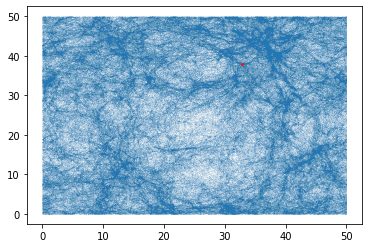

In [30]:
plt.scatter(Pos[:,0], Pos[:,1], s=0.00005)
theta = np.linspace(0, 2*np.pi, 50)

ind_massive = np.where(MassType[:,4]>10**10)
print(ind_massive[0][1])
plt.scatter(Pos[ind_massive[0][4],0], Pos[ind_massive[0][4],1], c='tab:red', s=5)
print(Pos[ind_massive[0][1],0], Pos[ind_massive[0][1],1], Pos[ind_massive[0][1],2])

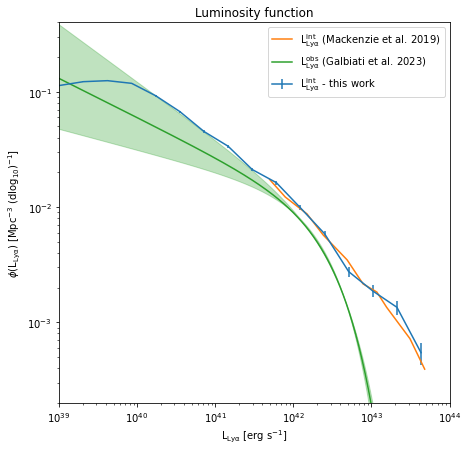

In [6]:
from lum_func import *
fig, ax = plt.subplots(1,1, figsize=(7,7))
L_lya = SFR*10**42
av_bin, counts, err_c = Lya_lumfunction(L_lya, 20, 50)

##LF
ax.errorbar(av_bin, counts, yerr=err_c, label=r'L$_{\rm Ly\alpha}^{\mathrm{int}}$ - this work')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Luminosity function')
ax.set_ylim(2*10**(-4), 4*10**(-1))
ax.set_xlim(1e39, 1e44)
ax.set_xlabel(r'L$_{\rm Ly\alpha}$ [erg s$^{-1}$]')
ax.set_ylabel(r'$\phi$(L$_{\rm Ly\alpha}$) [Mpc$^{-3}$ (dlog$_{10}$)$^{-1}$]')

#mackenzie_raw
mack_lf = np.genfromtxt('Mackenzie.txt')
ax.plot(mack_lf[:,0], mack_lf[:,1],label=r'L$_{\rm Ly\alpha}^{\mathrm{int}}$ (Mackenzie et al. 2019)')

#MAGG LF
def lum_fun(L, phi_star, alpha, L_star):
    return np.log(10)*phi_star*10**((L-L_star)*(alpha +1))*np.exp(-10**(L-L_star))

#from MAGG (the last one is the one I should use, the others are valid for selected samples)
alpha = [-1.164,-1.350,-1.418,-1.339]
L_star = [42.573, 42.558, 42.575, 42.466]
phi_star = [10**(-1.429), 10**(-1.788), 10**(-2.175), 10**(-2.422)]

err_par = [10**(0.121), 0.158, 0.08] #err_phi, err_alpha, err_logL_star

x_logsp = np.logspace(39, 44, 500)

magg = lum_fun(np.log10(x_logsp), phi_star[-1], alpha[-1], L_star[-1])
magg_1s_min = lum_fun(np.log10(x_logsp), phi_star[-1]/err_par[0], alpha[-1]-err_par[1], L_star[-1]+err_par[2])
magg_1s_max = lum_fun(np.log10(x_logsp), phi_star[-1]*err_par[0], alpha[-1]+err_par[1], L_star[-1]-err_par[2])
ax.plot((x_logsp), (magg), label=r"L$_{\rm Ly\alpha}^{\mathrm{obs}}$ (Galbiati et al. 2023)", c='tab:green')
ax.fill_between((x_logsp), (magg_1s_min), (magg_1s_max), color='tab:green', alpha=0.3)


ax.legend()
plt.savefig('Lya_lum_fun_prep.pdf', bbox_inches="tight")

In [7]:
np.savetxt('Engine_data.txt', np.array([Pos[:,0], Pos[:,1], Pos[:,2], L_lya, SFR, MassType[:,4], MassType[:,1]]).T)

In [8]:
print(np.max(L_lya))

6.143190383911133e+43


In [9]:
print(len(FirstSubhaloID))


2502493


In [83]:
file_colden = '/madfs/data/dc-syke1/Urchin/Runs/ScienceRuns/Planck1/L0050N1504/RECAL/data/snapshot_012_z003p017/eagle_h1grid_coldens_vz.hdf5'

In [98]:
file_cd =  h5py.File(file_colden, 'r')

print(file_cd.keys())
for i in file_cd['Units'].attrs:
    print(i)


<KeysViewHDF5 ['Grid0', 'Grid1', 'Grid2', 'Grid3', 'Groups', 'Header', 'PartType0', 'Stars', 'Units']>
UnitDensity_in_cgs
UnitLength_in_cm
UnitMass_in_g
UnitTime_in_s
UnitVelocity_in_cm_per_s


In [93]:
for i in file_cd['Grid0']:
    print(i)

Metallicity
SFR
SFRmass
SigmaVz
Temperature
Vz
mass


In [116]:
grid0 = []
grid0.append(file_cd['Grid0/Vz'][()])
grid1 = []
grid1.append(file_cd['Grid1/Vz'][()])
#grid3 = []
#grid3.append(file_cd['Grid3/Metallicity'][()])

In [117]:
print(len(grid0[0][1]))
print(len(grid1[0][1]))

32768
16384


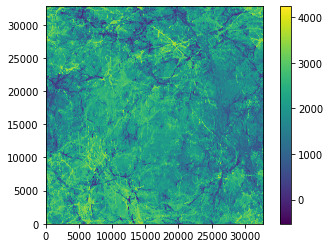

In [119]:
plt.imshow((grid0[0]), origin='lower')
plt.colorbar()

In [106]:
print(np.nanmin(grid0[0]), np.nanmax(grid0[0]))

0.0 0.4546882


In [107]:
Mass_stel = MassType[:,4]
sel_ind = ind_massive[0][1]
sel_mass = Mass_stel[sel_ind]
sel_pos = np.array(Pos[sel_ind]*0.6777)
sel_pos = sel_pos
print(sel_pos)
print(sel_mass)

[26.992327 29.582207 26.858934]
29305590000.0


In [108]:
file_HI = '/madfs/data/dc-syke1/Urchin/Runs/ScienceRuns/Planck1/L0050N1504/RECAL/data/snapshot_012_z003p017/Combine/urchin_snap_012_z003p017.'


part_ID = []
HI_frac = []
H_numden = []
PartPos = []

import read_eagle


snap = read_eagle.EagleSnapshot(file_HI+'0.hdf5')
delta_c = 0.5*0.6777
snap.select_region(sel_pos[0]-delta_c, sel_pos[0]+delta_c, sel_pos[1]-delta_c, sel_pos[1]+delta_c, sel_pos[2]-delta_c, sel_pos[2]+delta_c)
PartPos.append(snap.read_dataset(0, "Coordinates"))#0 = particle type
part_ID.extend(np.array(snap.read_dataset(0, "ParticleIDs")))
HI_frac.extend(snap.read_dataset(0, "HydrogenOneFraction"))
H_numden.extend(snap.read_dataset(0, "HydrogenNumberDensity"))

del snap
PartPos = np.array(PartPos[0])
H_numden = np.array(H_numden)
HI_frac = np.array(HI_frac)
part_ID = np.array(part_ID)

In [109]:
print(PartPos.shape)
print(np.min(PartPos), np.max(PartPos))
#print(np.where(part_ID == part_ID[j]))

(2513759, 3)
13.765781 17.47194


(2513759, 3)


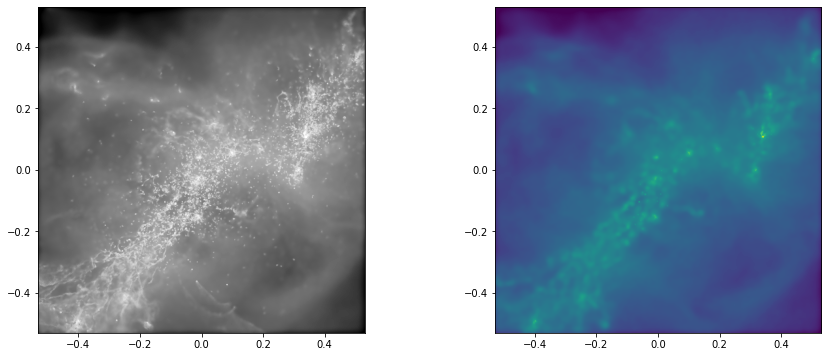

In [110]:
from sphviewer.tools import QuickView

showpls = np.array([PartPos[:,0], PartPos[:,1], PartPos[:,2]]).T
print(showpls.shape)
qv = QuickView(showpls, r = 'infinity', plot=False)
img = qv.get_image()
ext = qv.get_extent()

fig, ax = plt.subplots(1,2,figsize=(15,6))
im = ax[0].imshow(img, origin='lower', extent=ext, clim=[5,8], cmap='Greys_r')

qv1 = QuickView(np.array([PartPos[:,0], PartPos[:,1], np.log10(HI_frac)]).T, r = 'infinity', plot=False)
img_1 = qv1.get_image()
ext_1 = qv1.get_extent()

im1 = ax[1].imshow(img_1, origin='lower', extent=ext_1, clim=[5,9])
#plt.colorbar(im, ax[0])
#plt.colorbar(im1, ax[1])
plt.show()